**Caso: diabetes**

In [4]:
import pandas as pd
import numpy as np
import os

In [5]:
os.getcwd()

'C:\\Users\\sergi\\OneDrive\\Documentos\\SIR_personal\\Python_SDC_HP-i3\\Python_SDC_hpi3_git\\Python_SDC_GIT_'

In [21]:
data = pd.read_excel("diabetes_py.xlsx")

In [22]:
data.head(n=3)

,clase,glucosa,insulina,sspg
0,1,97,289,117
1,1,105,319,143
2,1,90,356,199


**target**: "1"= normal; "2"=pre-diabético; "3"=diabético

**particionamiento de los datos**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x= data.iloc[:,1:4].values
y= data.iloc[:,0].values

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2,
                                                   stratify=y,
                                                   random_state=2023)

**modelo de árbol de decisión**

In [26]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [27]:
model = DecisionTreeClassifier(criterion="entropy",
                              max_depth=3,
                              random_state=2023)

In [28]:
model_fit=model.fit(x_train,y_train)

In [29]:
#pip install graphviz

In [30]:
import graphviz
from sklearn.tree import export_graphviz
from subprocess import check_call

In [31]:
predictores = data.columns.tolist()[1:4];print(predictores)

['glucosa', 'insulina', 'sspg']


In [32]:
with open("bupa_dtree.dot","w") as dotfile:
    export_graphviz(model_fit, out_file=dotfile, feature_names=predictores)

In [37]:
os.getcwd()

'C:\\Users\\sergi\\OneDrive\\Documentos\\SIR_personal\\Python_SDC_HP-i3\\Python_SDC_hpi3_git\\Python_SDC_GIT_'

In [38]:
file = open("bupa_dtree.dot","r")

In [39]:
text = file.read()

In [40]:
text

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="insulina <= 431.0\\nentropy = 1.405\\nsamples = 92\\nvalue = [53, 21, 18]"] ;\n1 [label="insulina <= 420.5\\nentropy = 0.133\\nsamples = 54\\nvalue = [53, 1, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="entropy = 0.0\\nsamples = 52\\nvalue = [52, 0, 0]"] ;\n1 -> 2 ;\n3 [label="glucosa <= 97.5\\nentropy = 1.0\\nsamples = 2\\nvalue = [1, 1, 0]"] ;\n1 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 1, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 1\\nvalue = [1, 0, 0]"] ;\n3 -> 5 ;\n6 [label="glucosa <= 117.0\\nentropy = 0.998\\nsamples = 38\\nvalue = [0, 20, 18]"] ;\n0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n7 [label="entropy = 0.0\\nsamples = 20\\nvalue = [0, 20, 0]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 18\\nvalue = [0, 0, 18]"] ;\n6 -> 8 ;\n}'

In [41]:
from graphviz import Source

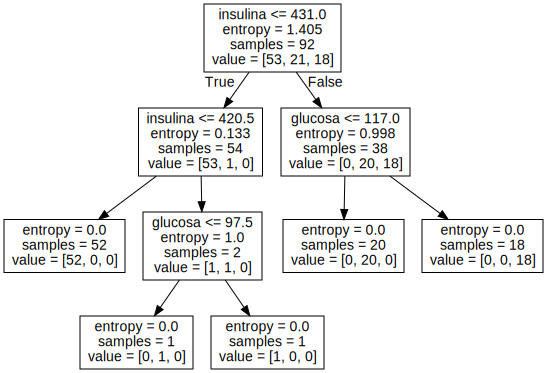

In [42]:
Source(text)

In [43]:
x1= glucosa
x2= insulina
x3= sspg

NameError: name 'glucosa' is not defined

**Interpretabilidad: generar reglas por el modelo aplicadas al negocio**

y ~ x2(insulina)

In [ ]:
Pr(y=1|x2<=431)=0.981
Pr(y=2|x2<=431)=0.018
Pr(y=3|x2<=431)=0
Pr(y=1|x2> 431)=0
Pr(y=2|x2> 431)=0.526
Pr(y=3|x2> 431)=0.474

y ~ x2(insulina) + x1(glucosa)

In [ ]:
Pr(y=1|x2> 431 & x1<= 117)=0
Pr(y=2|x2> 431 & x1<= 117)=1
Pr(y=3|x2> 431 & x1<= 117)=0
Pr(y=1|x2> 431 & x1>  117)=0
Pr(y=2|x2> 431 & x1>  117)=0
Pr(y=3|x2> 431 & x1>  117)=1

In [45]:
model = DecisionTreeClassifier(criterion="entropy",
                              max_depth=3,
                              random_state=2023)

**Recordemos**: si existe el problema de varianza interna en el modelo de árboles es mejor aplicar un modelo de ensamble (random forest o XGBoost, entre otros)

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
scores = cross_val_score(model,
                        x_train,
                        y_train,
                        scoring="accuracy",
                        cv=5)

In [48]:
scores

array([1.        , 0.94736842, 1.        , 0.94444444, 1.        ])

In [49]:
scores.mean()

0.9783625730994151

El modelo logra predecir 96 de cada 100 casos (registros)